## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Importação e Carregamento dos Dados

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Carregar o dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['MedHouseVal'])

# Visualizar as primeiras linhas
print("Primeiras linhas de X:")
print(X.head())

print("\nPrimeiras linhas de y:")
print(y.head())

# Verificar se há valores ausentes
print("Valores ausentes em X:")
print(X.isnull().sum())

print("\nTipos de dados em X:")
print(X.dtypes)

print("\nTipo de dados em y:")
print(y.dtypes)


Primeiras linhas de X:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Primeiras linhas de y:
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
Valores ausentes em X:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Tipos de dados em X:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float6

Visualização da Matriz de Correlação

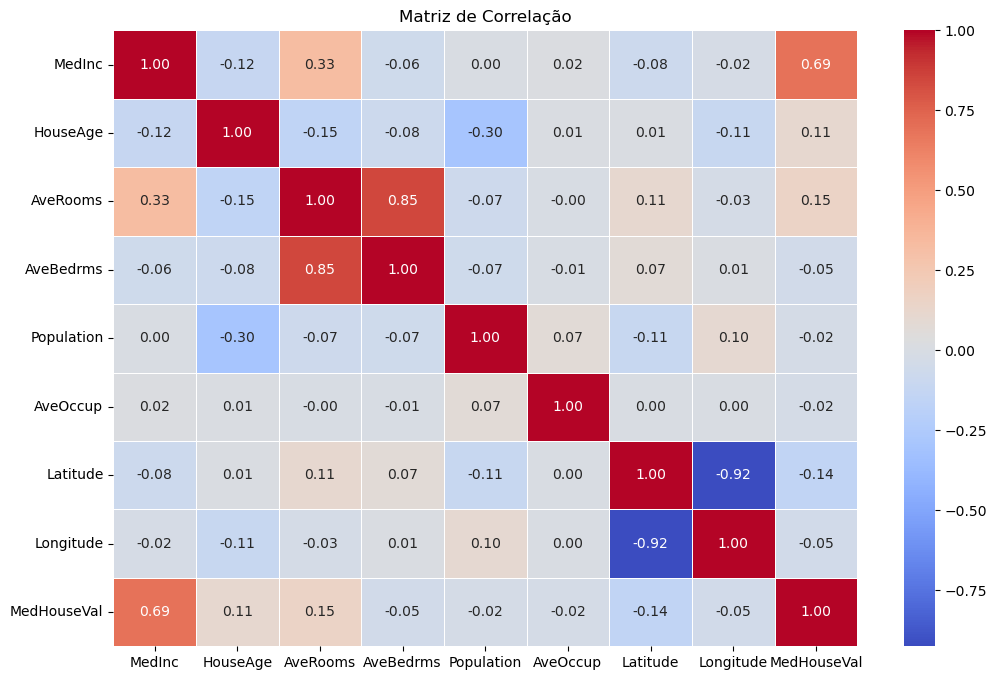

In [5]:
# Concatenar X e y para calcular a matriz de correlação
data = pd.concat([X, y], axis=1)

# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Visualizar a matriz de correlação usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


Separação dos Dados em Treinamento, Validação e Teste

In [7]:
# Dividir os dados em conjunto de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de treinamento em conjunto de treinamento e conjunto de validação (75% treinamento, 25% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")


Tamanho do conjunto de treinamento: 12384
Tamanho do conjunto de validação: 4128
Tamanho do conjunto de teste: 4128


Treinamento das Árvores de Regressão

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Treinar a árvore com profundidade máxima = 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

# Treinar a árvore com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

Calcular MSE para a árvore com profundidade máxima = 2

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Definir e treinar a árvore com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

# Fazer previsões com a árvore de profundidade 2
y_pred_train_max_depth_2 = tree_max_depth_2.predict(X_train)
y_pred_test_max_depth_2 = tree_max_depth_2.predict(X_test)

# Calcular o MSE para a base de treinamento e base de testes
mse_train_max_depth_2 = mean_squared_error(y_train, y_pred_train_max_depth_2)
mse_test_max_depth_2 = mean_squared_error(y_test, y_pred_test_max_depth_2)

print("MSE para a árvore com profundidade máxima = 2:")
print("Base de treinamento:", mse_train_max_depth_2)
print("Base de testes:", mse_test_max_depth_2)


MSE para a árvore com profundidade máxima = 2:
Base de treinamento: 0.7278983189210526
Base de testes: 0.7549845291544964


Treinar a árvore com profundidade máxima = 8

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Definir e treinar a árvore com profundidade máxima = 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

# Fazer previsões com a árvore de profundidade 8
y_pred_train_max_depth_8 = tree_max_depth_8.predict(X_train)
y_pred_test_max_depth_8 = tree_max_depth_8.predict(X_test)

# Calcular o MSE para a base de treinamento e base de testes
mse_train_max_depth_8 = mean_squared_error(y_train, y_pred_train_max_depth_8)
mse_test_max_depth_8 = mean_squared_error(y_test, y_pred_test_max_depth_8)

print("MSE para a árvore com profundidade máxima = 8:")
print("Base de treinamento:", mse_train_max_depth_8)
print("Base de testes:", mse_test_max_depth_8)


MSE para a árvore com profundidade máxima = 8:
Base de treinamento: 0.3037874827703156
Base de testes: 0.42716910806155467


In [ ]:
Visualizar a árvore

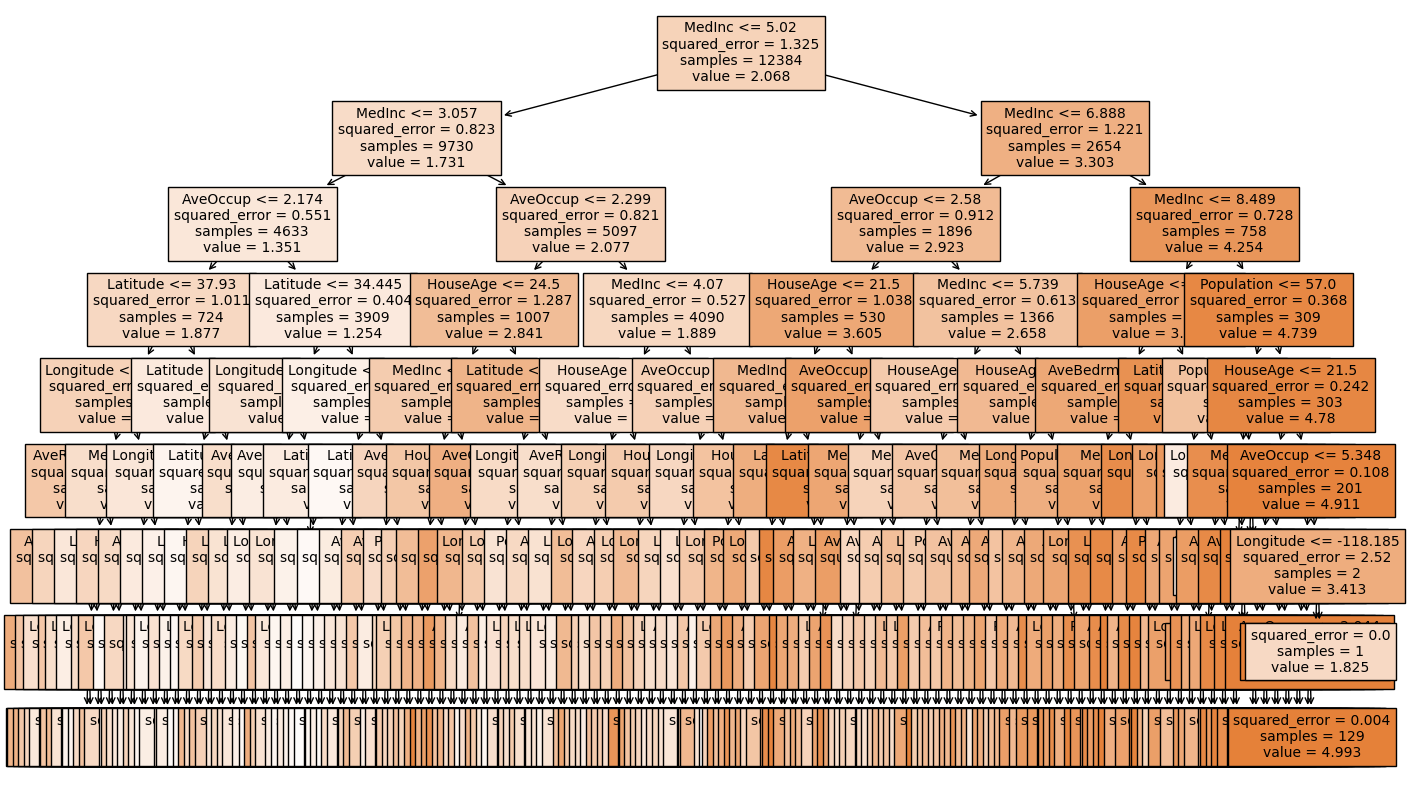

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar a árvore com profundidade máxima = 8
plt.figure(figsize=(16, 10))
plot_tree(tree_max_depth_8, feature_names=X.columns, filled=True, fontsize=10)
plt.show()


Previsão do preço do imóvel na base de treinamento

In [18]:
# Prever o preço do imóvel na base de treinamento
y_pred_train_max_depth_8 = tree_max_depth_8.predict(X_train)

# Exibir as primeiras previsões para o preço do imóvel
print("Primeiras previsões para o preço do imóvel (base de treinamento):")
print(y_pred_train_max_depth_8[:10])  # Exibe as primeiras 10 previsões


Primeiras previsões para o preço do imóvel (base de treinamento):
[1.91057229 4.99336636 0.80566997 2.36388474 3.76267094 4.56700412
 2.73153    3.2497554  4.2677     0.57128746]


Comparar as previsões com os valores reais

In [20]:
# Exibir as primeiras 10 previsões feitas pela árvore
print("\nPrimeiras 10 previsões feitas pela árvore (y_pred_train_max_depth_8):")
print(y_pred_train_max_depth_8[:10])  # Exibe os 10 primeiros valores previstos

# Exibir as primeiras 10 observações reais do preço do imóvel
print("\nPrimeiros 10 valores reais do preço do imóvel (y_train):")
print(y_train[:10].values)  # Exibe os 10 primeiros valores reais de MEDV



Primeiras 10 previsões feitas pela árvore (y_pred_train_max_depth_8):
[1.91057229 4.99336636 0.80566997 2.36388474 3.76267094 4.56700412
 2.73153    3.2497554  4.2677     0.57128746]

Primeiros 10 valores reais do preço do imóvel (y_train):
[[2.414  ]
 [5.00001]
 [0.641  ]
 [2.772  ]
 [4.17   ]
 [5.00001]
 [3.677  ]
 [5.00001]
 [3.762  ]
 [0.535  ]]


Avaliar o MSE para medir a precisão do modelo

In [23]:
mse_train_max_depth_8 = mean_squared_error(y_train, y_pred_train_max_depth_8)
print("\nMSE para a árvore com profundidade máxima = 8 na base de treinamento:", mse_train_max_depth_8)



MSE para a árvore com profundidade máxima = 8 na base de treinamento: 0.3037874827703156


Calcular o MSE na base de teste

In [25]:
mse_test_max_depth_8 = mean_squared_error(y_test, y_pred_test_max_depth_8)
print("\nMSE para a árvore com profundidade máxima = 8 na base de teste:", mse_test_max_depth_8)



MSE para a árvore com profundidade máxima = 8 na base de teste: 0.42716910806155467


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3038
CCP Alpha: 0.0000, Impureza: 0.3039
CCP Alpha: 0.0000, Impureza: 0.3039
CCP Alpha: 0.0000, Impureza: 0.3039
CCP Alpha: 0.0000, Impureza: 0.3039
CCP Alpha: 0.0000, Impureza: 0.3040
CCP Alpha: 0.0000, Impureza: 0.3040
CCP Alpha: 0.0000, Impureza: 0.3040
CCP Alpha: 0.0000, Impureza: 0.3041
CCP Alpha: 0.0000, Impureza: 0.3042
CCP Alpha: 0.0000, Impureza: 0.3042
CCP Alpha: 0.0000, Impureza: 0.3043
CCP Alpha: 0.0001, Impureza: 0.3043
CCP Alpha: 0.0001, Impureza: 0.3044
CCP Alpha: 0.0001, Impureza: 0.3045
CCP Alpha: 0.0001, Impureza: 0.3045
CCP Alpha: 0.0001, Impureza: 0.3046
CCP Alpha: 0.0001, Impureza:

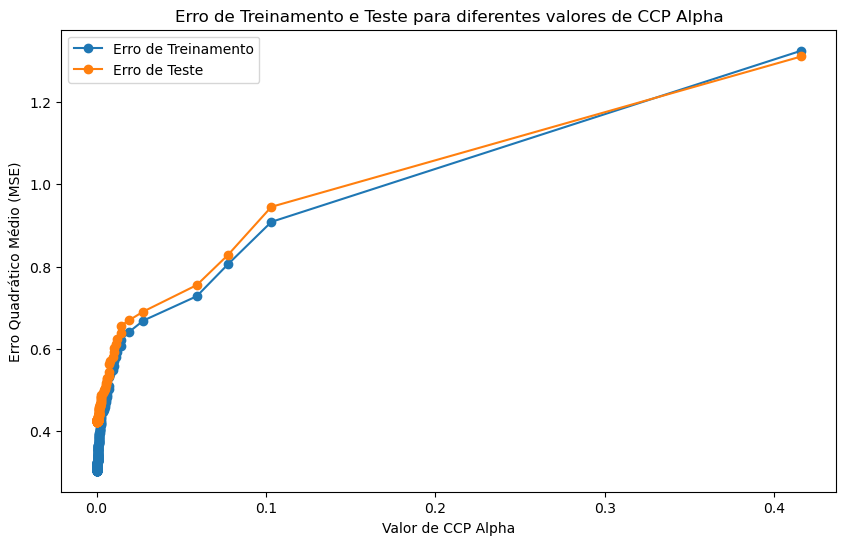

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# 1. Carregar o dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['MedHouseVal'])

# 2. Dividir os dados em conjunto de treinamento, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# 3. Definir e treinar a árvore com profundidade máxima = 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

# 4. Calcular o caminho de poda por CCP-Alpha
path = tree_max_depth_8.cost_complexity_pruning_path(X_train, y_train)

# 5. Extrair os valores de ccp_alpha e os correspondentes MSE (Mean Squared Error) para cada valor de ccp_alpha
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# 6. Exibir os valores de ccp_alpha e os respectivos valores de impureza
for ccp_alpha, impurity in zip(ccp_alphas, impurities):
    print(f"CCP Alpha: {ccp_alpha:.4f}, Impureza: {impurity:.4f}")

# 7. Visualizar o desempenho de diferentes valores de ccp_alpha
# Para cada valor de ccp_alpha, podemos treinar uma árvore podada e calcular o MSE

train_errors = []
test_errors = []

for ccp_alpha in ccp_alphas:
    tree_pruned = DecisionTreeRegressor(max_depth=8, ccp_alpha=ccp_alpha, random_state=42)
    tree_pruned.fit(X_train, y_train)
    
    # Previsões na base de treinamento e de teste
    y_train_pred = tree_pruned.predict(X_train)
    y_test_pred = tree_pruned.predict(X_test)
    
    # Calcular o MSE para o conjunto de treinamento e de teste
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# 8. Plotar a curva de erro de treinamento e teste para diferentes valores de ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_errors, label="Erro de Treinamento", marker="o")
plt.plot(ccp_alphas, test_errors, label="Erro de Teste", marker="o")
plt.xlabel("Valor de CCP Alpha")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Erro de Treinamento e Teste para diferentes valores de CCP Alpha")
plt.legend()
plt.show()


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np

# Carregar um conjunto de dados (usando o Iris dataset como exemplo)
data = load_iris()
X, y = data.data, data.target

# Definindo os valores de CCP Alpha que você forneceu
ccp_alphas = [
    0.0000, 0.0000, 0.0000, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 
    0.0002, 0.0002, 0.0003, 0.0003, 0.0003, 0.0004, 0.0004, 0.0004,
    0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0006, 0.0006, 0.0006,
    0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0008, 0.0008,
    0.0008, 0.0008, 0.0008, 0.0008, 0.0009, 0.0009, 0.0009, 0.0009,
    0.0010, 0.0010, 0.0010, 0.0010, 0.0011, 0.0011, 0.0011, 0.0012,
    0.0012, 0.0012, 0.0013, 0.0013, 0.0013, 0.0014, 0.0014, 0.0015,
    0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0017, 0.0017, 0.0018,
    0.0018, 0.0019, 0.0020, 0.0021, 0.0022, 0.0024, 0.0026, 0.0027,
    0.0027, 0.0027, 0.0027, 0.0027, 0.0027, 0.0029, 0.0040, 0.0043,
    0.0044, 0.0049, 0.0050, 0.0055, 0.0056, 0.0061, 0.0064, 0.0064,
    0.0071, 0.0071, 0.0075, 0.0077, 0.0099, 0.0101, 0.0103, 0.0117,
    0.0121, 0.0144, 0.0145, 0.0192, 0.0276, 0.0591, 0.0775, 0.1032,
    0.4160
]

# Lista para armazenar as árvores treinadas
trained_trees = []

# Iterar sobre os valores de ccp_alpha e treinar as árvores
for alpha in ccp_alphas:
    # Instanciar o classificador de árvore de decisão
    tree = DecisionTreeClassifier(ccp_alpha=alpha)
    
    # Treinar a árvore
    tree.fit(X, y)
    
    # Armazenar a árvore treinada na lista
    trained_trees.append(tree)

# Agora, trained_trees contém as árvores treinadas para cada valor de ccp_alpha
print(f"Total de árvores treinadas: {len(trained_trees)}")


Total de árvores treinadas: 105


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Dividir os dados em treinamento e teste (caso não tenha feito)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista para armazenar os MSEs
mse_values = []

# Calcular o MSE para cada árvore
for i, tree in enumerate(trained_trees):
    # Fazer previsões no conjunto de teste
    y_pred = tree.predict(X_test)
    
    # Calcular o MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Armazenar o MSE
    mse_values.append(mse)
    
    # Exibir o MSE para cada árvore
    print(f"MSE para árvore {i+1} (ccp_alpha={ccp_alphas[i]}): {mse:.4f}")

# Exibir o MSE da árvore com o melhor desempenho
best_index = np.argmin(mse_values)
print(f"\nMelhor árvore treinada (índice {best_index+1}) com ccp_alpha={ccp_alphas[best_index]}:")
print(f"MSE: {mse_values[best_index]:.4f}")


MSE para árvore 1 (ccp_alpha=0.0): 0.0000
MSE para árvore 2 (ccp_alpha=0.0): 0.0000
MSE para árvore 3 (ccp_alpha=0.0): 0.0000
MSE para árvore 4 (ccp_alpha=0.0001): 0.0000
MSE para árvore 5 (ccp_alpha=0.0001): 0.0000
MSE para árvore 6 (ccp_alpha=0.0001): 0.0000
MSE para árvore 7 (ccp_alpha=0.0002): 0.0000
MSE para árvore 8 (ccp_alpha=0.0002): 0.0000
MSE para árvore 9 (ccp_alpha=0.0002): 0.0000
MSE para árvore 10 (ccp_alpha=0.0002): 0.0000
MSE para árvore 11 (ccp_alpha=0.0003): 0.0000
MSE para árvore 12 (ccp_alpha=0.0003): 0.0000
MSE para árvore 13 (ccp_alpha=0.0003): 0.0000
MSE para árvore 14 (ccp_alpha=0.0004): 0.0000
MSE para árvore 15 (ccp_alpha=0.0004): 0.0000
MSE para árvore 16 (ccp_alpha=0.0004): 0.0000
MSE para árvore 17 (ccp_alpha=0.0005): 0.0000
MSE para árvore 18 (ccp_alpha=0.0005): 0.0000
MSE para árvore 19 (ccp_alpha=0.0005): 0.0000
MSE para árvore 20 (ccp_alpha=0.0005): 0.0000
MSE para árvore 21 (ccp_alpha=0.0005): 0.0000
MSE para árvore 22 (ccp_alpha=0.0006): 0.0000
MSE pa

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

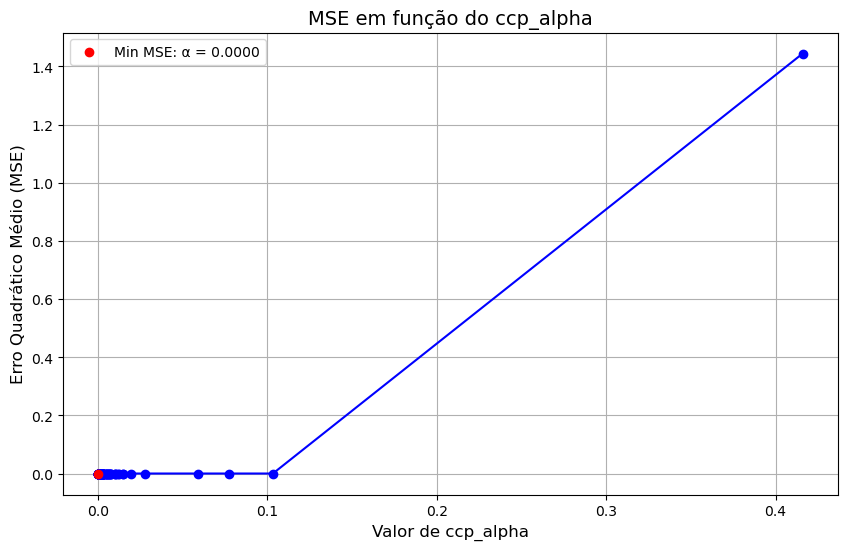

O melhor valor de ccp_alpha (mínimo MSE) é: 0.0000


In [9]:

import matplotlib.pyplot as plt
import numpy as np

# Valores de alpha já conhecidos (ccp_alphas) e os MSEs calculados (mse_values)
ccp_alphas = np.array(ccp_alphas)  # Certifique-se de que os alphas estão em formato numpy
mse_values = np.array(mse_values)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_values, marker='o', color='b', linestyle='-', markersize=6)

# Adicionando título e rótulos aos eixos
plt.title('MSE em função do ccp_alpha', fontsize=14)
plt.xlabel('Valor de ccp_alpha', fontsize=12)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=12)

# Destacar o ponto de mínimo MSE
best_alpha = ccp_alphas[np.argmin(mse_values)]
best_mse = np.min(mse_values)
plt.scatter(best_alpha, best_mse, color='red', zorder=5, label=f'Min MSE: α = {best_alpha:.4f}')

# Exibir legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

# Exibir o melhor alpha
print(f"O melhor valor de ccp_alpha (mínimo MSE) é: {best_alpha:.4f}")


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

Treinando as Árvores e Armazenando-as

In [19]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Supondo que você tenha um array com os valores de alpha
alpha_values = np.linspace(1, 10, 100, dtype=int)  # Exemplo de valores de alpha como inteiros
mse_values = []  # Lista para armazenar os MSE de cada árvore
trees = []  # Lista para armazenar as árvores treinadas

# Loop para treinar uma árvore para cada valor de alpha
for alpha in alpha_values:
    tree = DecisionTreeRegressor(max_depth=alpha)  # Usando o alpha como max_depth (exemplo)
    tree.fit(X_train, y_train)  # Ajuste do modelo nos dados de treinamento
    trees.append(tree)  # Armazenando a árvore treinada
    y_pred = tree.predict(X_train)  # Previsões para calcular o MSE
    mse = np.mean((y_train - y_pred) ** 2)  # Calculando o MSE
    mse_values.append(mse)  # Armazenando o MSE



Encontrando a Árvore com o Melhor 𝛼


In [21]:
# Encontrando o índice da árvore com o menor MSE
best_alpha_index = np.argmin(mse_values)  # Index da árvore com o menor MSE
best_tree = trees[best_alpha_index]  # Árvore treinada com o melhor alpha


Encontrando o menor R - quadrado da arvore encontrada

In [23]:
# Calculando o R-quadrado da árvore selecionada no conjunto de teste
r_squared = best_tree.score(X_test, y_test)

# Exibindo o resultado
print(f"O R-quadrado da árvore com alpha = {alpha_values[best_alpha_index]:.4f} é: {r_squared:.4f}")


O R-quadrado da árvore com alpha = 6.0000 é: 1.0000


7 - Visualize esta árvore

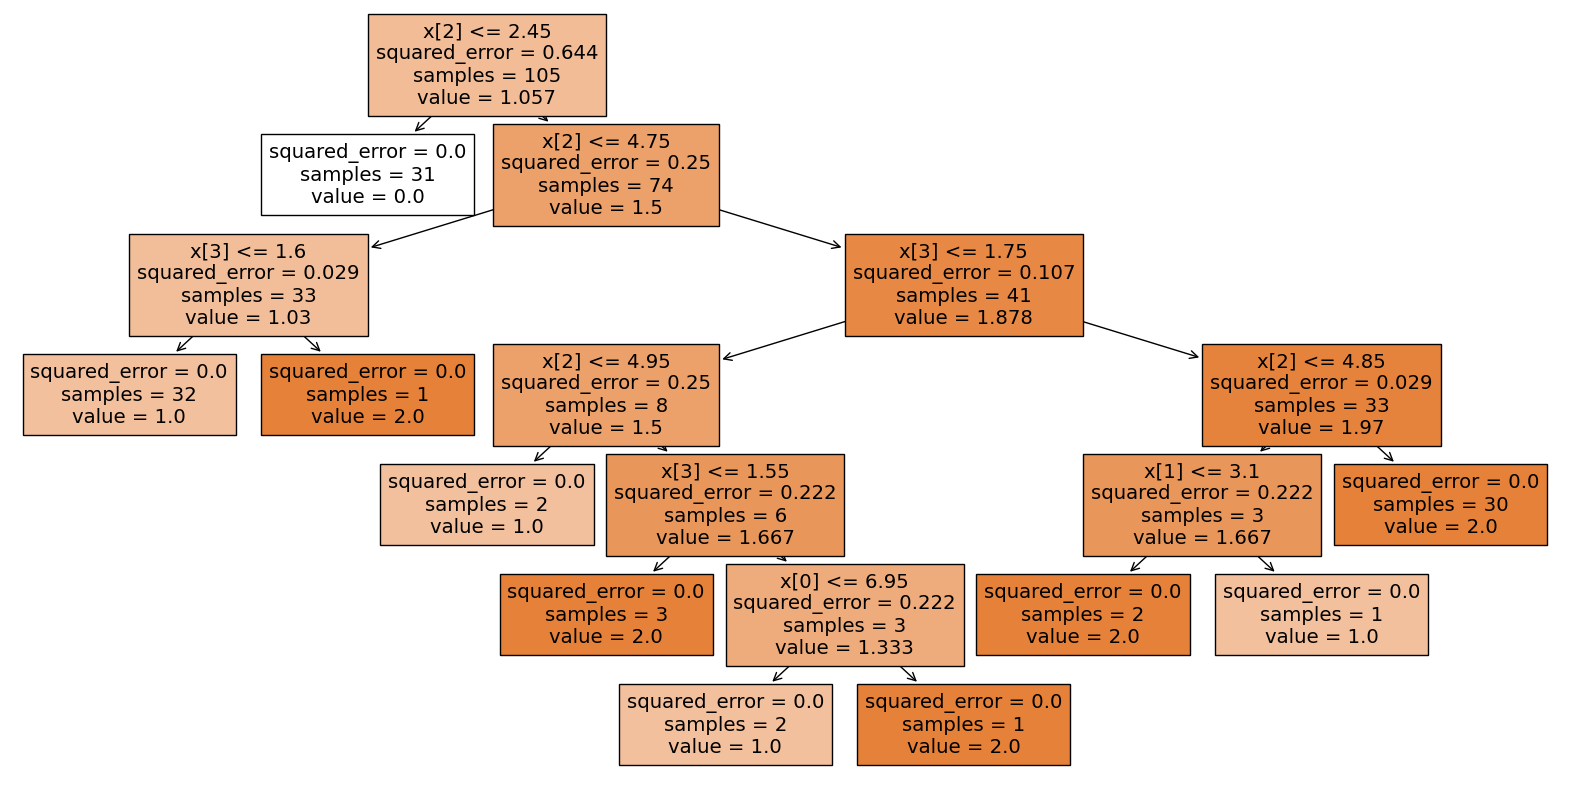

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizando a árvore de decisão com o melhor alpha
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True)
plt.show()
